In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

import os


Populating the interactive namespace from numpy and matplotlib


In [2]:
dist_n = np.random.randn(2000)
dist_b1 = np.random.binomial(1, 0.5, 2000)
dist_b2 = np.random.binomial(1, 0.7, 2000)
dist_p = np.random.poisson(0,2000)


Binomial (np = 0.5) to normal

In [10]:
print "binomial (np=0.5) on normal - KS", scipy.stats.kstest(dist_b1,'norm')
print "binomial (np=0.5) on normal - Anderson", scipy.stats.anderson(dist_b1, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

binomial (np=0.5) on normal - KS (0.5, 0.0)
binomial (np=0.5) on normal - Anderson (359.34992379310825, array([ 0.575,  0.655,  0.785,  0.916,  1.09 ]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.09]


BINOMIAL

In [19]:
#variable p, fixed n
p_array = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)

ks_binom = np.zeros(len(p_array))
ad_binom = np.zeros(len(p_array))
kl_binom = np.zeros(len(p_array))
chi2_b = np.zeros(len(p_array))

def gen_norm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)


for i,p in enumerate(p_array):
    n=20
    dist = np.random.binomial(n, p, 50000)
    #run the tests. 
 
    ks_binom[i] = scipy.stats.kstest(dist, gen_norm, args=(n*p, n*p*(1.0-p)))[0]
    ad_binom[i] = scipy.stats.anderson(dist, dist='norm')[0]

    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_binom[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

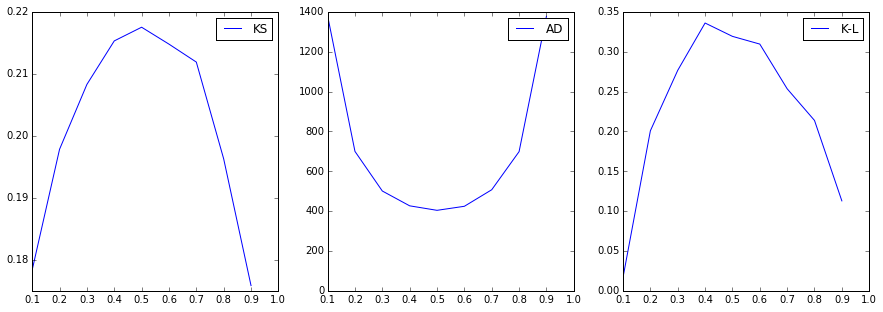

In [20]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(p_array, ks_binom, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(p_array, ad_binom,  label='AD')
pl.plot([p_array[0], p_array[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(p_array, kl_binom, label='K-L ')

pl.legend()

POISSON

In [47]:
n_array = range(1,100,1)
ks_p = np.zeros(len(n_array))
ad_p = np.zeros(len(n_array))
kl_p = np.zeros(len(n_array))
#chi2_p = np.zeros(len(n_array))


for i,n in enumerate(n_array):
    dist = np.random.poisson(n, 1000)
    ks_p[i] = scipy.stats.kstest(dist, gen_norm, args=(n, n))[0]
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_p [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

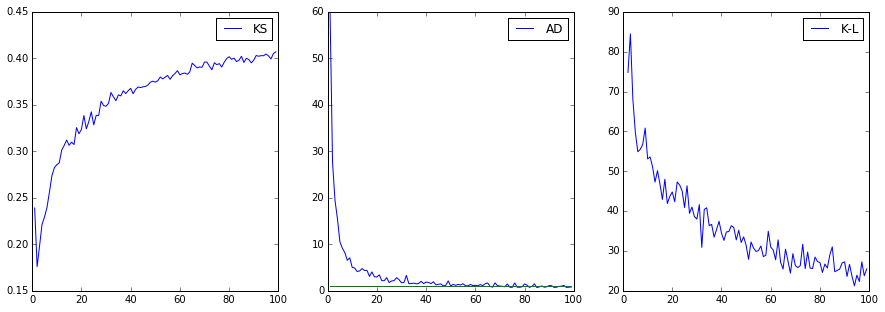

In [49]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(n_array, ks_p, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(n_array, ad_p,  label='AD')
pl.plot([n_array[0], n_array[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(n_array, kl_p, label='K-L ')

pl.legend()